##### import modules

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats
from scipy.stats import norm,skew

import os

#### import train and test data

In [9]:
train = pd.read_csv("./train.csv")
test  = pd.read_csv("./test.csv")

In [10]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
#Id feature can be dropped
train.drop("Id",axis=1,inplace=True)
test.drop("Id",axis=1,inplace=True)

In [13]:
#outlier detection???

mu = 180921.20 sigma = 79415.29


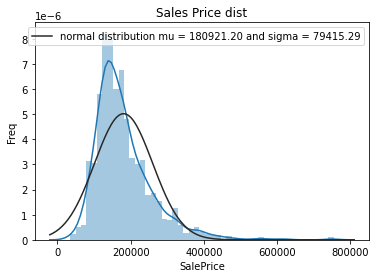

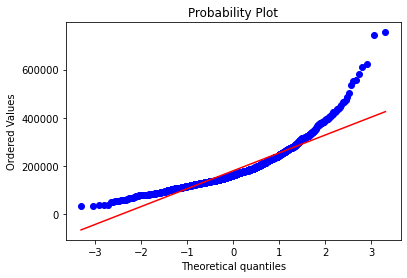

In [16]:
sns.distplot(train['SalePrice'],fit=norm)

(mu,sigma) = norm.fit(train['SalePrice'])
print("mu = {:.2f} sigma = {:.2f}".format(mu,sigma))

plt.legend(['normal distribution mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma)],loc='best')
plt.ylabel('Freq')
plt.title('Sales Price dist')

fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [17]:
#log transformation
train['SalePrice'] =np.log1p(train['SalePrice'])


mu = 12.02 sigma = 0.40


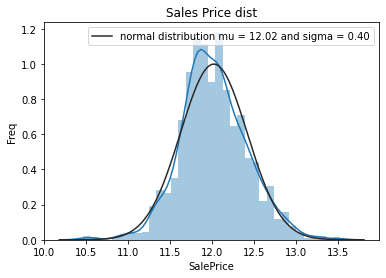

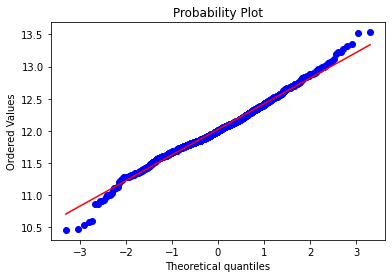

In [18]:
sns.distplot(train['SalePrice'],fit=norm)

(mu,sigma) = norm.fit(train['SalePrice'])
print("mu = {:.2f} sigma = {:.2f}".format(mu,sigma))

plt.legend(['normal distribution mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma)],loc='best')
plt.ylabel('Freq')
plt.title('Sales Price dist')

fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()